# CHARACHTERSTIC

IMPORT DATASET AND LIBRARY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scipy.stats as st

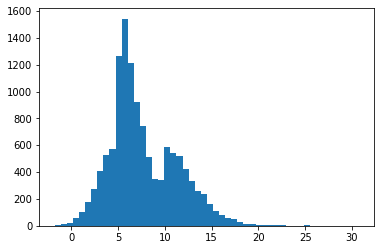

In [2]:
data = np.loadtxt("dataset.txt")

plt.hist(data, bins=50);

# MEAN


In [3]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed = summed+x
    return summed / len(xs)
print(get_mean([3,5,2,6]))

4.0


In [4]:
mean = np.mean(data)
print(mean,data.mean(),np.average(data))

7.68805056 7.68805056 7.68805056


# MEDIAN

In [5]:
def get_median(xs):
    mid = len(xs) //2
    if len(xs) %2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid+1])
print(get_median([7,7,3,1,4,5]))

4.5


In [6]:
median = np.median(data)
print(median)

6.7325


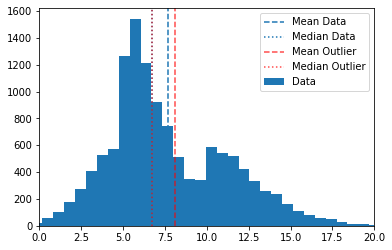

In [7]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

# MODE

In [8]:
def get_mode(xs):
    values,counts = np.unique(xs,return_counts = True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,2,3,4,5,6,3,2,3,2,2]))

2


In [9]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [10]:
hist,edges = np.histogram(data,bins =100)
edge_centers = 0.5 * (edges[1:]+ edges[:1])
mode = edge_centers[hist.argmax()]
print(mode)



1.80741


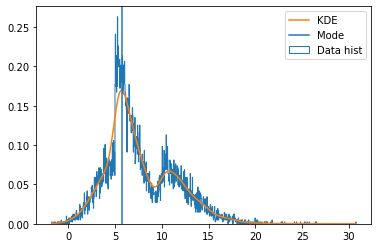

In [11]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

# COMPARISON

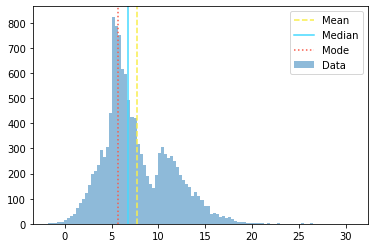

In [12]:
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

# VARIANCE

In [13]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**2
    return summed / (len(xs)-1)
print(get_variance([1,2,3,4,5]))

2.5


In [14]:
variance = np.var(data,ddof =1)
print(variance)

13.137626632694301


# STANDARD DEVIATION

In [15]:
std = np.std(data)
print(std,std**2)

3.6244414221454435 13.136575622563685


# output powers combined

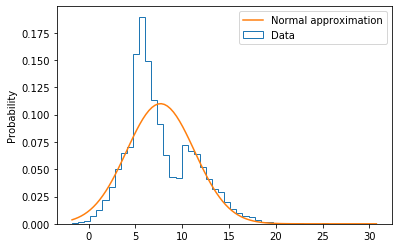

In [16]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability");

# Skewness

In [17]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**3
    return (summed / (len(xs)))/(var **1.5)
print(get_skewness([1,2,3,4,5]))

0.0


In [18]:
skewness = st.skew(data)
print(skewness ,get_skewness(data))

0.7408773663373577 0.7408773663373582


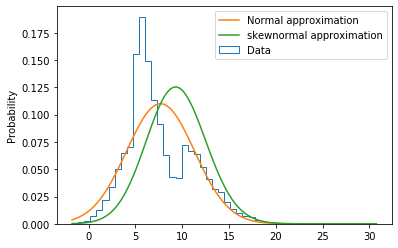

In [19]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs,skewness,loc= mean,scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

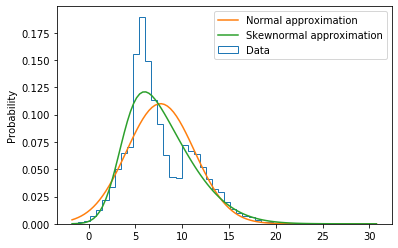

In [20]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

# KURTOSIS

In [21]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**4
    return (summed / (len(xs)))/(var **2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [22]:
kurtosis = st.kurtosis(data ,fisher = False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


# Percentile

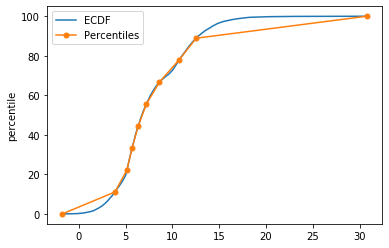

In [25]:
ps = np.linspace(0,100,10)
x_p = np.percentile(data,ps)

xs = np.sort(data)
ys= np.linspace(0,1,len(data))

plt.plot(xs,ys*100,label = "ECDF")
plt.plot(x_p,ps,label ="Percentiles",marker = ".",ms=10)
plt.legend()
plt.ylabel("percentile");


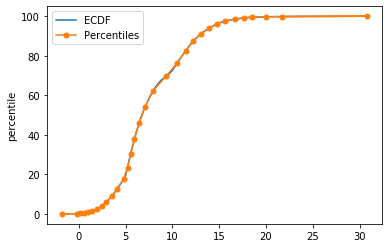

In [28]:
ps = 100* st.norm.cdf(np.linspace(-3,3,30))
ps = np.insert(ps,0,0)
ps = np.insert(ps,-1,100)
x_p = np.percentile(data,ps)

xs = np.sort(data)
ys= np.linspace(0,1,len(data))

plt.plot(xs,ys*100,label = "ECDF")
plt.plot(x_p,ps,label ="Percentiles",marker = ".",ms=10)
plt.legend()
plt.ylabel("percentile");

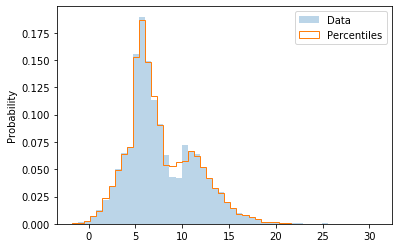

In [29]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();